In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
from ct_support_code import *

data = io.loadmat("ct_data.mat",squeeze_me=True)
X_train = data['X_train']
y_train = data['y_train']

X_val = data['X_val']
y_val = data['y_val']

X_test = data['X_test']
y_test = data['y_test']

In [2]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(40754, 384)
(5785, 384)
(6961, 384)
(40754,)
(5785,)
(6961,)


## Question 1 ##

a)

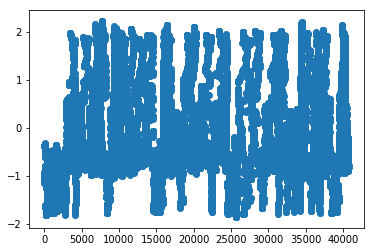

In [3]:
plt.scatter(range(len(y_train)),y_train)

(array([2496., 3445., 6825., 6440., 5313., 4498., 3392., 3361., 3358.,
        1626.]),
 array([-1.86793865, -1.45849298, -1.0490473 , -0.63960163, -0.23015596,
         0.17928972,  0.58873539,  0.99818106,  1.40762674,  1.81707241,
         2.22651809]),
 <a list of 10 Patch objects>)

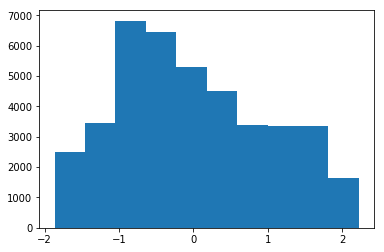

In [4]:
plt.hist(y_train)

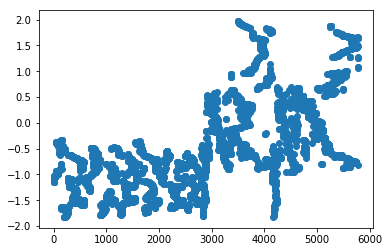

In [5]:
plt.scatter(range(5785),y_train[0:5785])

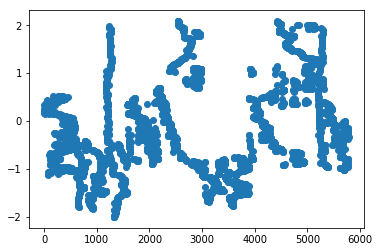

In [6]:
plt.scatter(range(5785),y_val)

In [3]:
print('The mean of the y_train vector is: %.4f' % np.mean(y_train))
print('The mean of the y_val vector is: %.4f' % np.mean(y_val))

The mean of the y_train vector is: -0.0000
The mean of the y_val vector is: -0.2160


In [4]:
print('Mean of y_val with standard error: %.4f +/- %.4f' % (np.mean(y_val),np.std(y_val)/(np.sqrt(5785))))
print('Mean of the first 5785 entries of y_train with standard error: %.4f +/- %.4f' % 
      (np.mean(y_train[0:5785]),np.std(y_train[0:5785])/(np.sqrt(5785))))

Mean of y_val with standard error: -0.2160 +/- 0.0129
Mean of the first 5785 entries of y_train with standard error: -0.4425 +/- 0.0119


b)

In [5]:
(X_train_mod, idx_non_duplicates) = np.unique(X_train,return_index=True,axis=1)

idx_non_duplicates = set(idx_non_duplicates)
the_range = set(range(X_train.shape[1]))
idx_duplicates = the_range - idx_non_duplicates

print(np.sort(list(idx_duplicates)))

[ 69  78  79 179 188 189 199 287 351 359]


In [6]:
X_train.shape

(40754, 384)

In [7]:
X_train_mod.shape

(40754, 374)

In [8]:
idx_constants = []
for ii in range(X_train.shape[1]):
    if(len(np.unique(X_train[:,ii])) == 1):
        idx_constants.append(ii)
print(idx_constants)

[59, 69, 179, 189, 351]


In [9]:
X_train[:,59]

array([-0.25, -0.25, -0.25, ..., -0.25, -0.25, -0.25])

In [10]:
idx_remove = np.unique(idx_constants + list(idx_duplicates))
idx_remove

array([ 59,  69,  78,  79, 179, 188, 189, 199, 287, 351, 359])

In [11]:
X_train_1 = np.delete(X_train,idx_remove,axis=1)
X_val_1 = np.delete(X_val,idx_remove,axis=1)
X_test_1 = np.delete(X_test,idx_remove,axis=1)

In [12]:
print(X_train_1.shape)
print(X_val_1.shape)
print(X_test_1.shape)

(40754, 373)
(5785, 373)
(6961, 373)


## Question 2 ##

In [13]:
def fit_linreg(X, yy, alpha):
    assert alpha >= 0, "Regularization parameter is negative."
    n_rows = X.shape[0]
    n_cols = X.shape[1]
    
    # If X is N x D, create a D x D identity matrix and multiply it with sqrt(alpha).
    # This matrix will be appended to X in order to add the regularization parameter
    # to the cost function.
    identity_mat = np.identity(n_cols)
    identity_mat = identity_mat * np.sqrt(alpha)
    
    # Create a (N+D) x 1 vector, where the first N entries are 1 and the rest 0.
    vector_bias = np.zeros((n_rows+n_cols,1))
    vector_bias[0:n_rows] = 1
    
    # Augment matrix X and vector yy:
    X_aug = np.concatenate((X,identity_mat),axis=0)
    X_aug = np.concatenate((vector_bias,X_aug),axis=1)
    yy_aug = np.concatenate((yy,np.zeros(n_cols)))
    
    weights_and_bias = np.linalg.lstsq(X_aug,yy_aug,rcond=None)[0]
    bias = weights_and_bias[0]
    weights = weights_and_bias[1:]
    
    return weights, bias

In [14]:
# SUM OF RESIDUALS DIFFERENT FROM RMSE.

In [15]:
def calculate_RMSE(yy_pred,yy_true):
    N = np.size(yy_pred)
    MSE = np.sum((yy_pred-yy_true)**2)/N
    return np.sqrt(MSE)

In [193]:
alpha = 10
linreg_weights, linreg_bias = fit_linreg(X_train_1,y_train,alpha)

y_train_pred = np.matmul(X_train_1,linreg_weights) + linreg_bias
y_val_pred = np.matmul(X_val_1,linreg_weights) + linreg_bias
y_test_pred = np.matmul(X_test_1,linreg_weights) + linreg_bias

print('Errors for least squares linear regression:')
print('RMSE on the training set: %.7f' % calculate_RMSE(y_train_pred,y_train))
print('RMSE on the validation set: %.7f' % calculate_RMSE(y_val_pred,y_val))
print('RMSE on the test set: %.7f' % calculate_RMSE(y_test_pred,y_test))

Errors for least squares linear regression:
RMSE on the training set: 0.3557589
RMSE on the validation set: 0.4205925
RMSE on the test set: 0.4439891


In [17]:
alpha = 10
linreg_gradopt_weights, linreg_gradopt_bias = fit_linreg_gradopt(X_train_1,y_train,alpha)

y_train_pred = np.matmul(X_train_1,linreg_gradopt_weights) + linreg_gradopt_bias
y_val_pred = np.matmul(X_val_1,linreg_gradopt_weights) + linreg_gradopt_bias

print('Errors for linear regression with gradient optimization:')
print('RMSE on the training set: %.7f' % calculate_RMSE(y_train_pred,y_train))
print('RMSE on the validation set: %.7f' % calculate_RMSE(y_val_pred,y_val))

Errors for linear regression with gradient optimization:
RMSE on the training set: 0.3557597
RMSE on the validation set: 0.4206038


## Question 3 ##

a)

In [201]:
# Subtract feature means of X_train_1 from X_train_1 and X_val_1.
X_mu = np.mean(X_train_1,axis=0)

X_train_centred = X_train_1 - X_mu
X_val_centred = X_val_1 - X_mu
X_test_centred = X_test_1 - X_mu

In [19]:
# Reduce the nr of features to 10.
V_10 = pca_zm_proj(X_train_centred,K=10)

X_train_10 = np.matmul(X_train_centred,V_10)
X_val_10 = np.matmul(X_val_centred,V_10)


alpha = 10
linreg_weights, linreg_bias = fit_linreg(X_train_10,y_train,alpha)

y_train_pred = np.matmul(X_train_10,linreg_weights) + linreg_bias
y_val_pred = np.matmul(X_val_10,linreg_weights) + linreg_bias

print('Errors for linear regression with number of features = 10 (reduced with PCA): ')
print('RMSE on the training set: %.4f' % calculate_RMSE(y_train_pred,y_train))
print('RMSE on the validation set: %.4f' % calculate_RMSE(y_val_pred,y_val))

Errors for linear regression with number of features = 10 (reduced with PCA): 
RMSE on the training set: 0.5729
RMSE on the validation set: 0.5717


In [203]:
# Reduce the nr of features to 100.
V_100 = pca_zm_proj(X_train_centred,K=100)

X_train_100 = np.matmul(X_train_centred,V_100)
X_val_100 = np.matmul(X_val_centred,V_100)
X_test_100 = np.matmul(X_test_centred,V_100)

alpha = 10
linreg_weights, linreg_bias = fit_linreg(X_train_100,y_train,alpha)

y_train_pred = np.matmul(X_train_100,linreg_weights) + linreg_bias
y_val_pred = np.matmul(X_val_100,linreg_weights) + linreg_bias
y_test_pred = np.matmul(X_test_100,linreg_weights) + linreg_bias

print('Errors for linear regression with number of features = 100 (reduced with PCA): ')
print('RMSE on the training set: %.4f' % calculate_RMSE(y_train_pred,y_train))
print('RMSE on the validation set: %.4f' % calculate_RMSE(y_val_pred,y_val))
print('RMSE on the validation set: %.4f' % calculate_RMSE(y_test_pred,y_test))

Errors for linear regression with number of features = 100 (reduced with PCA): 
RMSE on the training set: 0.4106
RMSE on the validation set: 0.4328
RMSE on the validation set: 0.4286


b)

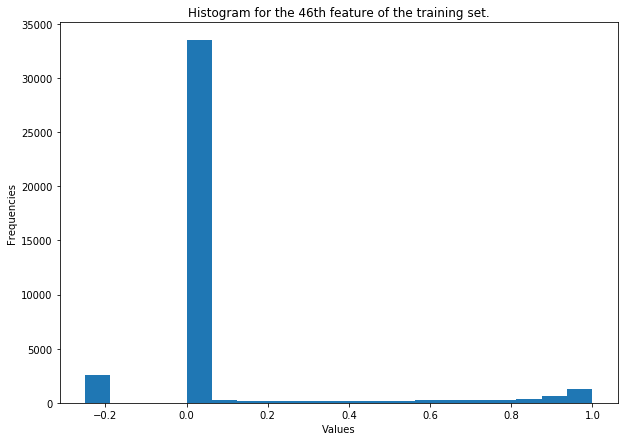

In [21]:
fig = plt.figure(figsize=(10,7))
plt.title('Histogram for the 46th feature of the training set.')
plt.xlabel('Values')
plt.ylabel('Frequencies')
plt.hist(X_train_1[:,45], bins=20)
plt.show()

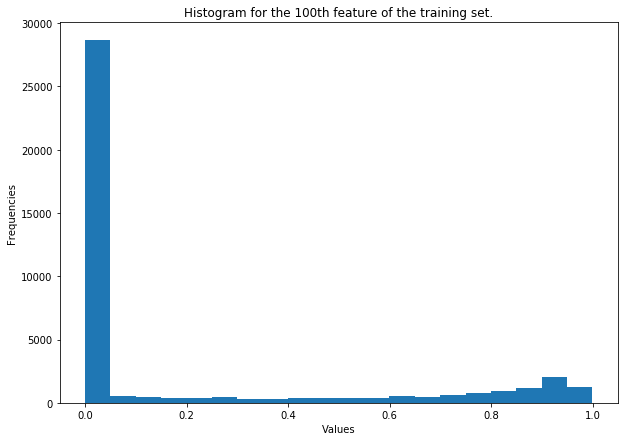

In [22]:
fig = plt.figure(figsize=(10,7))
plt.title('Histogram for the 100th feature of the training set.')
plt.xlabel('Values')
plt.ylabel('Frequencies')
plt.hist(X_train_1[:,100], bins=20)
plt.show()

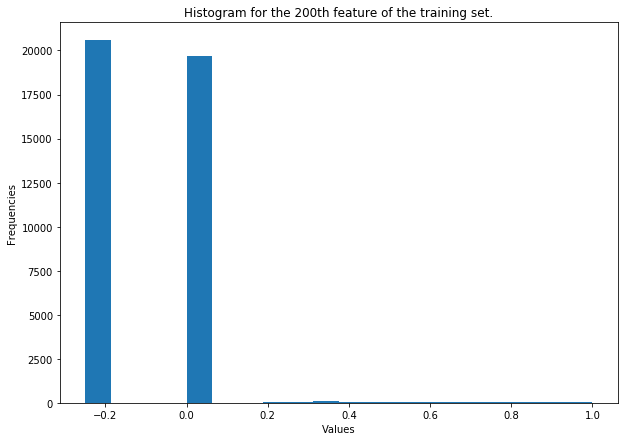

In [23]:
fig = plt.figure(figsize=(10,7))
plt.title('Histogram for the 200th feature of the training set.')
plt.xlabel('Values')
plt.ylabel('Frequencies')
plt.hist(X_train_1[:,200], bins=20)
plt.show()

In [24]:
count_25 = np.sum(np.sum(X_train_1 == -0.25, axis=0))
count_0 = np.sum(np.sum(X_train_1 == 0, axis=0))
nr_values = X_train_1.shape[0] * X_train_1.shape[1]

print('Fraction of the values equal to -0.25: %.4f ' % (count_25/nr_values))
print('Fraction of the values equal to 0: %.4f ' % (count_0/nr_values))
print('Fraction of the values equal to -0.25 or 0: %.4f ' % ((count_25 + count_0)/nr_values))

Fraction of the values equal to -0.25: 0.1358 
Fraction of the values equal to 0: 0.6678 
Fraction of the values equal to -0.25 or 0: 0.8036 


In [204]:
aug_fn = lambda X: np.concatenate([X, X==0, X<0], axis=1)

In [26]:
A = np.array([[1,-2],[0,2]])
B = aug_fn(A)
print(A)
print(B)

[[ 1 -2]
 [ 0  2]]
[[ 1 -2  0  0  0  1]
 [ 0  2  1  0  0  0]]


In [205]:
X_train_aug = aug_fn(X_train_1)
X_val_aug = aug_fn(X_val_1)
X_test_aug = aug_fn(X_test_1)

alpha = 10
linreg_weights, linreg_bias = fit_linreg(X_train_aug,y_train,alpha)

y_train_pred = np.matmul(X_train_aug,linreg_weights) + linreg_bias
y_val_pred = np.matmul(X_val_aug,linreg_weights) + linreg_bias
y_test_pred = np.matmul(X_test_aug,linreg_weights) + linreg_bias

print('RMSE on the training set: %.4f' % calculate_RMSE(y_train_pred,y_train))
print('RMSE on the validation set: %.4f' % calculate_RMSE(y_test_pred,y_test))

RMSE on the training set: 0.3178
RMSE on the validation set: 0.4304


## Question 4 ##

In [28]:
from scipy.optimize import minimize

In [43]:
def fit_logreg_gradopt(X, yy, alpha):
    D = X.shape[1]
    args = (X, yy, alpha)
    init = (np.zeros(D), np.array(0))
    ww, bb = minimize_list(logreg_cost, init, args)
    return ww, bb

In [197]:
K = 10 # number of thresholded classification problems to fit
mx = np.max(y_train)
mn = np.min(y_train)
hh = (mx-mn)/(K+1)

alpha = 10

X_train_log = np.zeros((X_train_1.shape[0],10))
X_val_log = np.zeros((X_val_1.shape[0],10))
X_test_log = np.zeros((X_test_1.shape[0],10))
ww_log = np.zeros((K,X_train_1.shape[1]))
bb_log = np.zeros(K)

thresholds = np.linspace(mn+hh, mx-hh, num=K, endpoint=True)
for kk in range(K):
    labels = y_train > thresholds[kk]
    ww, bb = fit_logreg_gradopt(X_train_1,labels,alpha)
    ww_log[kk,:] = ww
    bb_log[kk] = bb
    aa_train = np.matmul(X_train_1,ww) + bb
    X_train_log[:,kk] = 1/(1+np.exp(-aa_train))
    aa_val = np.matmul(X_val_1,ww) + bb
    X_val_log[:,kk] = 1/(1+np.exp(-aa_val))
    aa_test = np.matmul(X_test_1,ww) + bb
    X_test_log[:,kk] = 1/(1+np.exp(-aa_test))

In [200]:
alpha = 10
linreg_weights_4, linreg_bias_4 = fit_linreg(X_train_log,y_train,alpha)

y_train_pred = np.matmul(X_train_log,linreg_weights_4) + linreg_bias_4
y_val_pred = np.matmul(X_val_log,linreg_weights_4) + linreg_bias_4
y_test_pred = np.matmul(X_test_log,linreg_weights_4) + linreg_bias_4

print('RMSE on the training set: %.4f' % calculate_RMSE(y_train_pred,y_train))
print('RMSE on the validation set: %.4f' % calculate_RMSE(y_val_pred,y_val))
print('RMSE on the test set: %.4f' % calculate_RMSE(y_test_pred,y_test))

RMSE on the training set: 0.1383
RMSE on the validation set: 0.2521
RMSE on the test set: 0.2898


## Question 5 ##

In [32]:
def glorot_init(fan_in,fan_out,shape,seed):
    sum_fan_in_fan_out = fan_in + fan_out
    bound = (6/sum_fan_in_fan_out)**0.5
    np.random.seed(seed)
    return np.random.uniform(-bound,bound,shape)

In [33]:
seed = 101

def fit_nn_gradopt(X, yy, alpha):
    D = X.shape[1]
    K = 10
    args = (X, yy, alpha)
    init = (glorot_init(K,1,(K,),101), np.array(0), glorot_init(K,D,(K,D),seed), np.zeros((K,)))
    ww, bb, V, bk = minimize_list(nn_cost, init, args)
    return ww, bb, V, bk

In [34]:
ww, bb, V, bk = fit_nn_gradopt(X_train_1,y_train,10)

In [35]:
alpha = 10

y_train_pred = nn_cost((ww,bb,V,bk),X_train_1)
y_val_pred = nn_cost((ww,bb,V,bk),X_val_1)

print('RMSE on the training set: %.4f' % calculate_RMSE(y_train_pred,y_train))
print('RMSE on the validation set: %.4f' % calculate_RMSE(y_val_pred,y_val))

RMSE on the training set: 0.0974
RMSE on the validation set: 0.2644


In [36]:
def fit_nn_gradopt_init(X, yy, alpha):
    D = X.shape[1]
    K = 10
    args = (X, yy, alpha)
    init = (linreg_weights_4, linreg_bias_4, ww_log, bb_log)
    ww, bb, V, bk = minimize_list(nn_cost, init, args)
    return ww, bb, V, bk

In [37]:
ww, bb, V, bk = fit_nn_gradopt_init(X_train_1,y_train,10)

In [38]:
alpha = 10

y_train_pred = nn_cost((ww,bb,V,bk),X_train_1)
y_val_pred = nn_cost((ww,bb,V,bk),X_val_1)

print('RMSE on the training set: %.4f' % calculate_RMSE(y_train_pred,y_train))
print('RMSE on the validation set: %.4f' % calculate_RMSE(y_val_pred,y_val))

RMSE on the training set: 0.1053
RMSE on the validation set: 0.2563


## Question 6 ##

In [189]:
aug_fn = lambda X: np.concatenate([X, X==0, X<0], axis=1)

X_train_aug = aug_fn(X_train_1)
X_val_aug = aug_fn(X_val_1)
X_test_aug = aug_fn(X_test_1)

ww, bb, V, bk = fit_nn_gradopt(X_train_aug,y_train,10)
y_train_pred = nn_cost((ww,bb,V,bk),X_train_aug)
y_val_pred = nn_cost((ww,bb,V,bk),X_val_aug)

print('RMSE on the training set: %.4f' % calculate_RMSE(y_train_pred,y_train))
print('RMSE on the validation set: %.4f' % calculate_RMSE(y_val_pred,y_val))

RMSE on the training set: 0.0776
RMSE on the validation set: 0.2453


In [191]:
K = 25
mx = np.max(y_train)
mn = np.min(y_train)
hh = (mx-mn)/(K+1)

alpha = 10

X_train_log = np.zeros((X_train_aug.shape[0],K))
X_val_log = np.zeros((X_val_aug.shape[0],K))
X_test_log = np.zeros((X_test_aug.shape[0],K))
ww_log = np.zeros((K,X_train_aug.shape[1]))
bb_log = np.zeros(K)
ww_lin = np.zeros((K,X_train_aug.shape[1]))
bb_lin = np.zeros(K)

thresholds = np.linspace(mn+hh, mx-hh, num=K, endpoint=True)
for kk in range(K):
    labels = y_train > thresholds[kk]
    ww, bb = fit_logreg_gradopt(X_train_aug,labels,alpha)
    ww_l, bb_l = fit_linreg(X_train_aug[labels,:],y_train[labels],alpha)
    ww_lin[kk,:] = ww_l
    bb_lin[kk] = bb_l
    ww_log[kk,:] = ww
    bb_log[kk] = bb
    aa_train = np.matmul(X_train_aug,ww) + bb
    X_train_log[:,kk] = 1/(1+np.exp(-aa_train))
    aa_val = np.matmul(X_val_aug,ww) + bb
    X_val_log[:,kk] = 1/(1+np.exp(-aa_val))
    aa_test = np.matmul(X_test_aug,ww) + bb
    X_test_log[:,kk] = 1/(1+np.exp(-aa_test))

In [192]:
alpha = 10

linreg_weights_4, linreg_bias_4 = fit_linreg(X_train_log,y_train,alpha)

y_train_pred = np.matmul(X_train_log,linreg_weights_4) + linreg_bias_4
y_val_pred = np.matmul(X_val_log,linreg_weights_4) + linreg_bias_4
y_test_pred = np.matmul(X_test_log,linreg_weights_4) + linreg_bias_4

print('RMSE on the training set: %.4f' % calculate_RMSE(y_train_pred,y_train))
print('RMSE on the validation set: %.4f' % calculate_RMSE(y_val_pred,y_val))
print('RMSE on the test set: %.4f' % calculate_RMSE(y_test_pred,y_test))

RMSE on the training set: 0.0847
RMSE on the validation set: 0.2263
RMSE on the test set: 0.2562


In [138]:
means = np.sum(X_val_log,axis=1)
means = np.reshape(means,(X_val_log.shape[0],1))
X_val_norm = X_val_log/means

(array([3., 1., 0., 0., 0., 0., 0., 0., 0., 6.]),
 array([3.72998103e-06, 1.65307157e-02, 3.30577014e-02, 4.95846871e-02,
        6.61116727e-02, 8.26386584e-02, 9.91656441e-02, 1.15692630e-01,
        1.32219616e-01, 1.48746601e-01, 1.65273587e-01]),
 <a list of 10 Patch objects>)

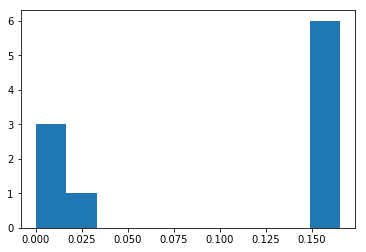

In [139]:
plt.hist(X_val_norm[0,:])

(array([3.281e+03, 1.292e+03, 1.069e+03, 8.300e+01, 3.100e+01, 1.100e+01,
        5.000e+00, 5.000e+00, 6.000e+00, 2.000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

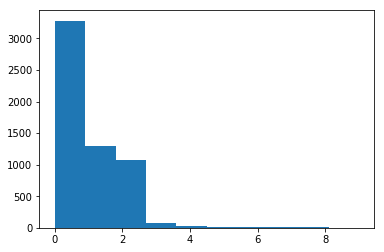

In [140]:
plt.hist(np.argmax(X_val_norm, axis=1))

In [141]:
indices = np.sum(X_val_norm > 0.9, axis=1) == 1

In [142]:
print(indices.shape)

(5785,)


(array([  0.,   0.,   0.,   0.,   0., 489.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

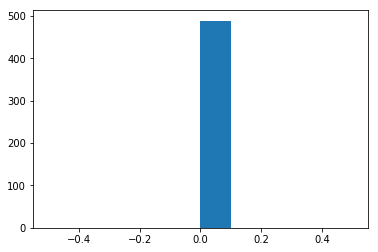

In [143]:
plt.hist(np.argmax(X_val_norm[indices,:],axis=1))

In [144]:
X_val_diff = X_val_aug[indices,:]
X_val_normal = X_val_log[indices==0,:]

In [145]:
y_val_diff = y_val[indices]
y_val_normal = y_val[indices==0]

In [146]:
y_pred_normal = np.matmul(X_val_normal,linreg_weights_4) + linreg_bias_4
y_pred_diff = np.matmul(X_val_diff,ww_lin[0,:]) + bb_lin[0]

In [147]:
y_pred = np.concatenate((y_pred_normal,y_pred_diff))
y_val_red = np.concatenate((y_val_normal,y_val_diff))
print(calculate_RMSE(y_pred,y_val_red))

0.2571956904944814


In [94]:
X_val_log[indices,:][100,:]

array([9.99157036e-01, 1.07038743e-01, 2.29806723e-06, 5.69435851e-06,
       4.87790326e-08, 8.00238165e-06, 2.74499195e-07, 7.86265261e-08,
       1.66643560e-07, 9.10653291e-10])

In [168]:
alpha = 10
linreg_weights, linreg_bias = fit_linreg(X_train_1**2,y_train,alpha)

y_train_pred = np.matmul(X_train_1**2,linreg_weights) + linreg_bias
y_val_pred = np.matmul(X_val_1**2,linreg_weights) + linreg_bias

print('RMSE on the training set: %.4f' % calculate_RMSE(y_train_pred,y_train))
print('RMSE on the validation set: %.4f' % calculate_RMSE(y_val_pred,y_val))

RMSE on the training set: 0.3555
RMSE on the validation set: 0.4165


In [170]:
aug_fn = lambda X: np.concatenate([X**2, X==0, X<0], axis=1)

X_train_aug = aug_fn(X_train_1)
X_val_aug = aug_fn(X_val_1)

linreg_weights, linreg_bias = fit_linreg(X_train_aug,y_train,alpha)

y_train_pred = np.matmul(X_train_aug,linreg_weights) + linreg_bias
y_val_pred = np.matmul(X_val_aug,linreg_weights) + linreg_bias

print('RMSE on the training set: %.4f' % calculate_RMSE(y_train_pred,y_train))
print('RMSE on the validation set: %.4f' % calculate_RMSE(y_val_pred,y_val))

RMSE on the training set: 0.3113
RMSE on the validation set: 0.3752


In [178]:
Ks = [6,10,15,20,25,30]

alpha = 10
train_errors = []
val_errors = []

for K in Ks:
    mx = np.max(y_train)
    mn = np.min(y_train)
    hh = (mx-mn)/(K+1)

    X_train_log = np.zeros((X_train_aug.shape[0],K))
    X_val_log = np.zeros((X_val_aug.shape[0],K))
    ww_log = np.zeros((K,X_train_aug.shape[1]))
    bb_log = np.zeros(K)

    thresholds = np.linspace(mn+hh, mx-hh, num=K, endpoint=True)
    for kk in range(K):
        labels = y_train > thresholds[kk]
        ww, bb = fit_logreg_gradopt(X_train_aug,labels,alpha)
        ww_log[kk,:] = ww
        bb_log[kk] = bb
        aa_train = np.matmul(X_train_aug,ww) + bb
        X_train_log[:,kk] = 1/(1+np.exp(-aa_train))
        aa_val = np.matmul(X_val_aug,ww) + bb
        X_val_log[:,kk] = 1/(1+np.exp(-aa_val))
    
    linreg_weights_4, linreg_bias_4 = fit_linreg(X_train_log,y_train,alpha)

    y_train_pred = np.matmul(X_train_log,linreg_weights_4) + linreg_bias_4
    y_val_pred = np.matmul(X_val_log,linreg_weights_4) + linreg_bias_4
    
    train_errors.append(calculate_RMSE(y_train_pred,y_train))
    val_errors.append(calculate_RMSE(y_val_pred,y_val))

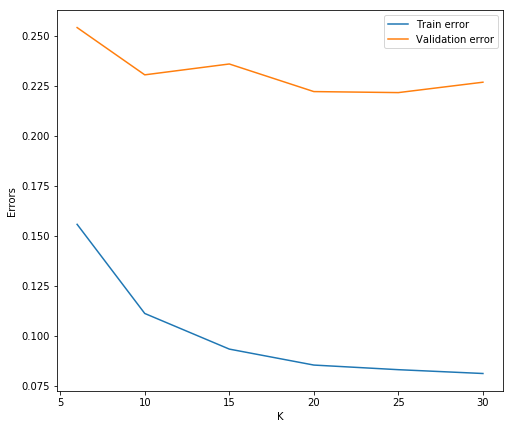

In [187]:
plt.figure(figsize=(8,7))
plt.plot(Ks,train_errors)
plt.plot(Ks,val_errors)
plt.xlabel('K')
plt.ylabel('Errors')
plt.legend(['Train error', 'Validation error'])
plt.show()

In [183]:
val_errors

[0.25404499815548975,
 0.23043090555427725,
 0.23585662414792186,
 0.22206642172454016,
 0.22155988043866326,
 0.22675049785404938]

In [184]:
train_errors

[0.1557409853779872,
 0.11121091182066922,
 0.09341019303400899,
 0.08543303923479095,
 0.08312418254301669,
 0.08121579588384333]

In [188]:
print('RMSE on the training set for K = 10: %.4f' % train_errors[1])
print('RMSE on the training set for K = 25: %.4f' % train_errors[4])
print('RMSE on the validation set for K = 10: %.4f' % val_errors[1])
print('RMSE on the validation set for K = 25: %.4f' % val_errors[4])

RMSE on the training set for K = 10: 0.1112
RMSE on the training set for K = 25: 0.0831
RMSE on the validation set for K = 10: 0.2304
RMSE on the validation set for K = 25: 0.2216
